In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import sys
import random
## For modeling ###
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, BatchNormalization
from keras. callbacks import EarlyStopping
from keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from sklearn.model_selection import train_test_split

In [45]:
df = pd.read_csv('EGFR_3.csv')
df = df.sample(frac=1).reset_index(drop=True)
df

,Age,Age_normalized,Sex,smoking,survival,sur_time_mo,prog_time_mo,VDW,EEL,EGB,...,EEL.1,EPB,ENPOLAR,TOTAL.1,Matching_rates,Centroid_distance,Connectivity,Convex_atoms,Hydrogen_bonds,response
0,79,4,0,2,0,37.03,18.560,-51.9140,-26.6512,39.3616,...,-26.6512,38.5811,-36.8522,-76.8363,0.4136,48.25,17.186,25,1450,stable
1,76,4,0,2,0,9.69,9.690,-51.9140,-26.6512,39.3616,...,-26.6512,38.5811,-36.8522,-76.8363,0.4136,48.25,22.186,25,1450,partial
2,73,4,0,1,1,42.15,21.520,-51.9140,-26.6512,39.3616,...,-26.6512,38.5811,-36.8522,-76.8363,0.4136,48.25,21.186,24,1450,partial
3,52,2,1,0,0,28.78,11.890,-50.5251,-22.0131,41.9059,...,-22.0131,46.8522,-34.3009,-59.9869,0.4135,48.55,21.019,29,1650,partial
4,51,2,1,1,0,18.69,11.560,-50.5251,-22.0131,41.9059,...,-22.0131,46.8522,-34.3009,-59.9869,0.4135,48.55,21.019,29,1650,partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,69,3,0,0,0,5.06,5.060,-51.9140,-26.6512,39.3616,...,-26.6512,38.5811,-36.8522,-76.8363,0.4136,48.25,22.186,21,1450,partial
197,70,3,1,2,0,2.00,1.667,-45.7159,-12.8403,30.1702,...,-12.0850,40.2891,-32.0103,-35.0310,0.2634,49.45,14.464,21,910,no
198,51,2,1,0,0,39.62,24.610,-50.5251,-22.0131,41.9059,...,-22.0131,46.8522,-34.3009,-59.9869,0.4135,48.55,21.019,27,1650,partial
199,60,2,0,0,1,9.20,10.000,-51.9140,-26.6512,39.3616,...,-26.6512,38.5811,-36.8522,-76.8363,0.4136,48.25,22.186,23,1450,partial


In [46]:
X = df.drop(['Age', 'response', 'EEL',  'VDW', 'EPB', 'ENPOLAR'], axis = 1)
y = df['response']
X.shape

(201, 17)

In [47]:
normalized_df=(X-X.mean())/X.std()
 ## Defining Energy, Geometric and Demographics Features ###
X_e = normalized_df[["EGB", "TOTAL", "ESURF", "EEL.1"]]
X_p = normalized_df[["Age_normalized", "Sex", "survival", "sur_time_mo"]]
#X_p = np.array(X_p)
#X_p.dtype
X_e = normalized_df[["EGB", "TOTAL", "ESURF", "EEL.1"]]
X_e = np.array(X_e)
X_e.shape
X_g1 = normalized_df[["Matching_rates", "Connectivity", "Hydrogen_bonds"]]
X_g1 = np.array(X_g1)
X_g2 = normalized_df[["Convex_atoms", "Centroid_distance"]]
X_g2 = np.array(X_g2)
X_total = np.concatenate((X_p, X_e, X_g1, X_g2), axis = 1)
X_totalep = np.concatenate((X_p, X_e), axis = 1)
X_totaleg = np.concatenate((X_e, X_g1, X_g2), axis = 1)
X_totalpg = np.concatenate((X_p, X_g1, X_g2), axis = 1)
X_totalg = np.concatenate((X_g1, X_g2), axis = 1)



X_total.shape


(201, 13)

In [48]:
# In the first step we will split the data in training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_total,y, test_size=0.3)
# Now since we want the valid (30% each of training data). 
# we have to define valid_size=0.5 (that is 50% of training data)
test_size = 0.3
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train,y_train, test_size=0.3)
print(X_train.shape), print(y_train.shape)
print(X_train1.shape), print(y_train1.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train1 = np.array(X_train1)
y_train1 = np.array(y_train1)

(140, 13)
(140,)
(98, 13)
(98,)
(42, 13)
(42,)
(61, 13)
(61,)


In [49]:
# one - hot encoding Y
encoder =  LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
dummy_y_train = np_utils.to_categorical(encoded_y_train)
dummy_y_train.dtype
dummy_y_train.shape
# One-hot encoding Test
encoder_test = LabelEncoder()
encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)
dummy_y_test = np_utils.to_categorical(encoded_y_test)
dummy_y_test.shape
# one - hot encoding Y
encoder =  LabelEncoder()
encoder.fit(y_valid)
encoded_y_valid = encoder.transform(y_valid)
dummy_y_valid = np_utils.to_categorical(encoded_y_valid)
dummy_y_valid.dtype
dummy_y_valid.shape
# one - hot encoding Y
encoder =  LabelEncoder()
encoder.fit(y_train1)
encoded_y_train1 = encoder.transform(y_train1)
dummy_y_train1 = np_utils.to_categorical(encoded_y_train1)
dummy_y_train1.dtype
dummy_y_train1.shape


(98, 4)

In [50]:
# manual nested cross-validation for random forest on a classification dataset
#from sklearn.model_selection import cross_val_predict
#from xgboost import XGBClassifier
#from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, valid_ix in cv_outer.split(X_train):
	# split data
	X_train1, X_valid = X_train[train_ix, :], X_train[valid_ix, :]
	y_train1, y_valid = y_train[train_ix], y_train[valid_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = RandomForestClassifier(random_state=1)
	# define search space
	space = dict()
	space['n_estimators'] = [10, 100, 500]
	space['max_features'] = [2, 4, 6, 10, 12]
	space['max_depth'] = [3, None]
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train1, y_train1)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_valid)
	# evaluate the model
	acc = accuracy_score(y_valid, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=1.000, est=0.944, cfg={'max_depth': 3, 'max_features': 10, 'n_estimators': 10}
>acc=0.857, est=0.937, cfg={'max_depth': 3, 'max_features': 10, 'n_estimators': 10}
>acc=1.000, est=0.944, cfg={'max_depth': 3, 'max_features': 12, 'n_estimators': 10}
>acc=0.929, est=0.944, cfg={'max_depth': 3, 'max_features': 10, 'n_estimators': 10}
>acc=0.786, est=0.968, cfg={'max_depth': 3, 'max_features': 10, 'n_estimators': 100}
>acc=0.857, est=0.976, cfg={'max_depth': None, 'max_features': 10, 'n_estimators': 10}
>acc=1.000, est=0.952, cfg={'max_depth': 3, 'max_features': 10, 'n_estimators': 100}
>acc=0.929, est=0.968, cfg={'max_depth': None, 'max_features': 6, 'n_estimators': 10}
>acc=0.929, est=0.952, cfg={'max_depth': 3, 'max_features': 10, 'n_estimators': 10}
>acc=1.000, est=0.952, cfg={'max_depth': 3, 'max_features': 10, 'n_estimators': 10}
Accuracy: 0.929 (0.071)


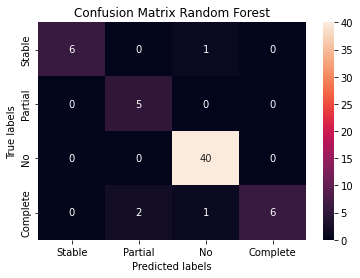

In [51]:
### Running the model on independent Test set ###
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
import seaborn as sns
predrf = best_model.predict(X_test)
matrixrf = confusion_matrix(y_test, predrf)
ax= plt.subplot()
sns.heatmap(matrixrf, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forest'); 
ax.xaxis.set_ticklabels(['Stable', 'Partial', 'No', 'Complete']); 
ax.yaxis.set_ticklabels(['Stable', 'Partial', 'No', 'Complete']);


              precision    recall  f1-score   support

    complete       1.00      0.86      0.92         7
          no       0.71      1.00      0.83         5
     partial       0.95      1.00      0.98        40
      stable       1.00      0.67      0.80         9

    accuracy                           0.93        61
   macro avg       0.92      0.88      0.88        61
weighted avg       0.95      0.93      0.93        61



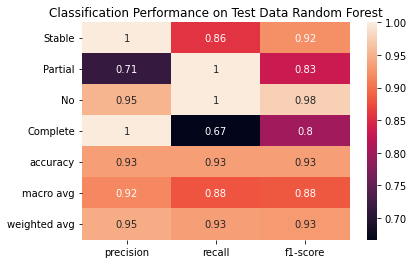

In [52]:
# one - hot encoding Y
encoder =  LabelEncoder()
encoder.fit(predrf)
encoded_predrf_train = encoder.transform(predrf)
dummy_predrf_train = np_utils.to_categorical(encoded_predrf_train)
dummy_predrf_train.dtype
dummy_predrf_train.shape
###  Classificcation Report ###
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot()
print(classification_report(y_test, predrf))
clf_report_nn = classification_report(dummy_y_test.argmax(axis=1), dummy_predrf_train.argmax(axis=1), labels=[0, 1, 2 ,3], target_names=['Stable', 'Partial', 'No', 'Complete'], output_dict=True)
#sns.heatmap(pd.DataFrame(clf_report_nn).iloc[:-1, :].T, annot=True)
sns.heatmap(pd.DataFrame(clf_report_nn).iloc[:-1, :].T, annot=True)
ax.set_title('Classification Performance on Test Data Random Forest'); 


In [53]:
# manual nested cross-validation of Xgboost on a classification dataset
# Using XGBoost method
import xgboost
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, valid_ix in cv_outer.split(X_train):
	# split data
	X_train1, X_valid = X_train[train_ix, :], X_train[valid_ix, :]
	y_train1, y_valid = y_train[train_ix], y_train[valid_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = xgboost.XGBClassifier()
	# define search space
	space = dict()
	space['n_estimators'] = [10, 100, 500]
	space['max_features'] = [2, 4, 6, 8, 10]
	#space['max_depth'] = [3, None]
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train1, y_train1)
	# get the best performing model fit on the whole training set
	best_model_xgb = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model_xgb.predict(X_valid)
	# evaluate the model
	acc = accuracy_score(y_valid, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=1.000, est=0.937, cfg={'max_features': 2, 'n_estimators': 100}
>acc=0.857, est=0.937, cfg={'max_features': 2, 'n_estimators': 10}
>acc=1.000, est=0.944, cfg={'max_features': 2, 'n_estimators': 10}
>acc=0.929, est=0.929, cfg={'max_features': 2, 'n_estimators': 10}
>acc=0.786, est=0.968, cfg={'max_features': 2, 'n_estimators': 10}
>acc=0.857, est=0.960, cfg={'max_features': 2, 'n_estimators': 100}
>acc=0.929, est=0.960, cfg={'max_features': 2, 'n_estimators': 10}
>acc=0.929, est=0.960, cfg={'max_features': 2, 'n_estimators': 10}
>acc=0.929, est=0.952, cfg={'max_features': 2, 'n_estimators': 10}
>acc=1.000, est=0.952, cfg={'max_features': 2, 'n_estimators': 10}
Accuracy: 0.921 (0.067)


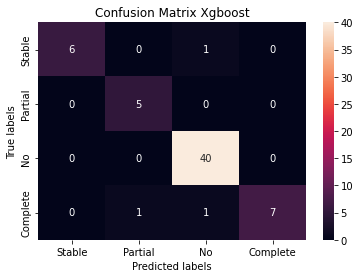

In [54]:
### Running the model on independent Test set ###
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
import seaborn as sns
predxgb = best_model_xgb.predict(np.asmatrix(X_test))
matrixxgb = confusion_matrix(y_test, predxgb)
ax= plt.subplot()
sns.heatmap(matrixxgb, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Xgboost'); 
ax.xaxis.set_ticklabels(['Stable', 'Partial', 'No', 'Complete']); 
ax.yaxis.set_ticklabels(['Stable', 'Partial', 'No', 'Complete']);


              precision    recall  f1-score   support

    complete       1.00      0.86      0.92         7
          no       0.83      1.00      0.91         5
     partial       0.95      1.00      0.98        40
      stable       1.00      0.78      0.88         9

    accuracy                           0.95        61
   macro avg       0.95      0.91      0.92        61
weighted avg       0.96      0.95      0.95        61



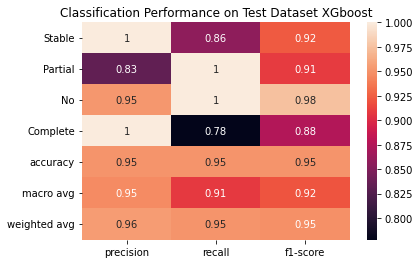

In [55]:
# one - hot encoding Y
encoder =  LabelEncoder()
encoder.fit(predxgb)
encoded_predxgb_train = encoder.transform(predxgb)
dummy_pred_xgb_train = np_utils.to_categorical(encoded_predxgb_train)
dummy_pred_xgb_train.dtype
dummy_pred_xgb_train.shape
###  Classificcation Report ###
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot()
print(classification_report(y_test, predxgb))
clf_report_nn = classification_report(dummy_y_test.argmax(axis=1), dummy_pred_xgb_train.argmax(axis=1), labels=[0, 1, 2 ,3], target_names=['Stable', 'Partial', 'No', 'Complete'], output_dict=True)
#sns.heatmap(pd.DataFrame(clf_report_nn).iloc[:-1, :].T, annot=True)
sns.heatmap(pd.DataFrame(clf_report_nn).iloc[:-1, :].T, annot=True)
ax.set_title('Classification Performance on Test Dataset XGboost'); 

In [56]:
# manual nested cross-validation for a on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, valid_ix in cv_outer.split(X_train):
	# split data
	X_train1, X_valid = X_train[train_ix, :], X_train[valid_ix, :]
	y_train1, y_valid = y_train[train_ix], y_train[valid_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = KNeighborsClassifier(n_neighbors=5)
 	# define search space
	params = [{
    'n_neighbors': [3, 5, 7, 9, 12,15,17],
    'weights': ['uniform', 'distance'],
    \
    'metric': ['euclidean', 'manhattan']}]
	# define search
	search = GridSearchCV(model, params, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train1, y_train1)
	# get the best performing model fit on the whole training set
	best_model_knn = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model_knn.predict(X_valid)
	# evaluate the model
	acc = accuracy_score(y_valid, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))
 

>acc=0.571, est=0.770, cfg={'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
>acc=1.000, est=0.714, cfg={'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
>acc=0.786, est=0.667, cfg={'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
>acc=0.786, est=0.714, cfg={'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
>acc=0.643, est=0.754, cfg={'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
>acc=0.643, est=0.738, cfg={'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
>acc=0.571, est=0.730, cfg={'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
>acc=0.857, est=0.706, cfg={'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
>acc=0.714, est=0.746, cfg={'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
>acc=0.857, est=0.690, cfg={'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.743 (0.132)


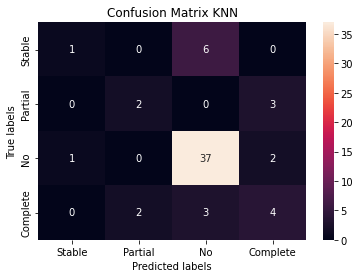

In [57]:
### Running the model on independent Test set ###
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
import seaborn as sns
predknn = best_model_knn.predict(X_test)
matrixknn = confusion_matrix(y_test, predknn)
ax= plt.subplot()
sns.heatmap(matrixknn, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix KNN'); 
ax.xaxis.set_ticklabels(['Stable', 'Partial', 'No', 'Complete']); 
ax.yaxis.set_ticklabels(['Stable', 'Partial', 'No', 'Complete']);

              precision    recall  f1-score   support

    complete       0.50      0.14      0.22         7
          no       0.50      0.40      0.44         5
     partial       0.80      0.93      0.86        40
      stable       0.44      0.44      0.44         9

    accuracy                           0.72        61
   macro avg       0.56      0.48      0.49        61
weighted avg       0.69      0.72      0.69        61



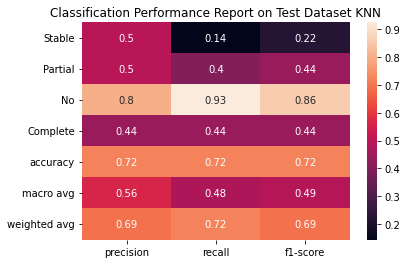

In [58]:
# one - hot encoding Y
encoder =  LabelEncoder()
encoder.fit(predknn)
encoded_predknn_train = encoder.transform(predknn)
dummy_pred_knn_train = np_utils.to_categorical(encoded_predknn_train)
dummy_pred_knn_train.dtype
dummy_pred_knn_train.shape
###  Classificcation Report ###
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot()
print(classification_report(y_test, predknn))
clf_report_nn = classification_report(dummy_y_test.argmax(axis=1), dummy_pred_knn_train.argmax(axis=1), labels=[0, 1, 2 ,3], target_names=['Stable', 'Partial', 'No', 'Complete'], output_dict=True)
#sns.heatmap(pd.DataFrame(clf_report_nn).iloc[:-1, :].T, annot=True)
sns.heatmap(pd.DataFrame(clf_report_nn).iloc[:-1, :].T, annot=True)
ax.set_title('Classification Performance Report on Test Dataset KNN'); 

In [62]:
# Using SVM method
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
#rbf = svm.SVC(kernel='rbf', gamma=0.5, C=1).fit(X_train, Y_train)
#poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, Y_train)
#poly_pred = poly.predict(X_test)
#rbf_pred = rbf.predict(X_test)
#cvs= cross_val_score(poly, X_train, Y_train, scoring = 'accuracy', cv=cv)
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, valid_ix in cv_outer.split(X_train):
	# split data
	X_train1, X_valid = X_train[train_ix, :], X_train[valid_ix, :]
	y_train1, y_valid = y_train[train_ix], y_train[valid_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = SVC()
 	# define search space
	space = dict()
	space = [{"C": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]}]
	space = [{"gamma": [0.001, 0.01, 0.1, 1, 10]}]
	space = [{"kernel": ['poly', 'rbf', 'linear']}]
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train1, y_train1)
	# get the best performing model fit on the whole training set
	best_model_svc = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model_svc.predict(X_valid)
	# evaluate the model
	acc = accuracy_score(y_valid, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

#print('cross_val_score',cvs.mean())
#matrix = confusion_matrix(Y_test, rbf_pred)
#ax= plt.subplot()
#sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
#ax.set_xlabel('Predicted labels');
#ax.set_ylabel('True labels'); 
#ax.xaxis.set_ticklabels(['Stable', 'Partial', 'No', 'Complete']); ax.yaxis.set_ticklabels(['Stable', 'Partial', 'No', 'Complete']);
#ax.set_title('Confusion Matrix SVM');
#encoder =  LabelEncoder()
#encoder.fit(rbf_pred)
#encoded_y_pred = encoder.transform(rbf_pred)
#dummy_y_predsvm = np_utils.to_categorical(encoded_y_pred)

#clf_report_svm = classification_report(dummy_y_test.argmax(axis=1), dummy_y_predsvm.argmax(axis=1), labels=[0, 1, 2 ,3], target_names=['Stable', 'Partial', 'No', 'Complete'], output_dict=True)
#sns.heatmap(pd.DataFrame(clf_report_svm).iloc[:-1, :].T, annot=True)
#ax.set_title('Classification Report SVM');

>acc=0.786, est=0.921, cfg={'kernel': 'linear'}
>acc=1.000, est=0.905, cfg={'kernel': 'linear'}
>acc=1.000, est=0.841, cfg={'kernel': 'linear'}
>acc=1.000, est=0.905, cfg={'kernel': 'linear'}
>acc=1.000, est=0.913, cfg={'kernel': 'linear'}
>acc=0.857, est=0.865, cfg={'kernel': 'linear'}
>acc=1.000, est=0.873, cfg={'kernel': 'linear'}
>acc=0.857, est=0.873, cfg={'kernel': 'linear'}
>acc=0.857, est=0.865, cfg={'kernel': 'linear'}
>acc=1.000, est=0.873, cfg={'kernel': 'linear'}
Accuracy: 0.936 (0.081)


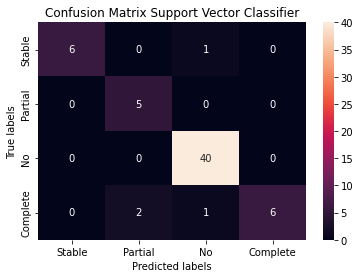

In [63]:
### Running the model on independent Test set ###
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
import seaborn as sns
predsvc = best_model_svc.predict(X_test)
matrixsvc = confusion_matrix(y_test, predsvc)
ax= plt.subplot()
sns.heatmap(matrixsvc, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Support Vector Classifier'); 
ax.xaxis.set_ticklabels(['Stable', 'Partial', 'No', 'Complete']); 
ax.yaxis.set_ticklabels(['Stable', 'Partial', 'No', 'Complete']);

              precision    recall  f1-score   support

    complete       1.00      0.86      0.92         7
          no       0.71      1.00      0.83         5
     partial       0.95      1.00      0.98        40
      stable       1.00      0.67      0.80         9

    accuracy                           0.93        61
   macro avg       0.92      0.88      0.88        61
weighted avg       0.95      0.93      0.93        61



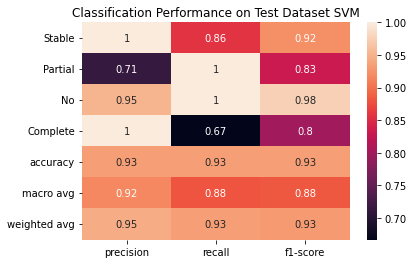

In [64]:
# one - hot encoding Y
encoder =  LabelEncoder()
encoder.fit(predsvc)
encoded_predsvc_train = encoder.transform(predsvc)
dummy_pred_svc_train = np_utils.to_categorical(encoded_predsvc_train)
dummy_pred_svc_train.dtype
dummy_pred_svc_train.shape
###  Classificcation Report ###
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot()
print(classification_report(y_test, predsvc))
clf_report_nn = classification_report(dummy_y_test.argmax(axis=1), dummy_pred_svc_train.argmax(axis=1), labels=[0, 1, 2 ,3], target_names=['Stable', 'Partial', 'No', 'Complete'], output_dict=True)
#sns.heatmap(pd.DataFrame(clf_report_nn).iloc[:-1, :].T, annot=True)
sns.heatmap(pd.DataFrame(clf_report_nn).iloc[:-1, :].T, annot=True)
ax.set_title('Classification Performance on Test Dataset SVM'); 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [85]:
## Accuracy score or MCC for Classification ### y-scarmbling
#y_train = np.array(y_train)
from sklearn.model_selection import cross_val_score
from tqdm.notebook import trange
shuffled_MCC = []
for i in range(50):
  Y_train = y_train.sample(frac=1, replace = False, random_state=0)
  model = xgboost.XGBClassifier()
  model.fit(X_train, Y_train)
  #pred = model.predict(X_test)
  cv =5
  y_pred = cross_val_predict(model, X_test, y_test)
  #matrix = confusion_matrix(y_test, pred)
  cv_score = cross_val_score(model, X_train, Y_train, cv = cv)
  shuffled_MCC.append(cv_score)

print('Mean Value', cv_score.mean())


Mean Value 0.5428571428571429


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_total, y, test_size=0.30, random_state=42)

In [87]:
encoder =  LabelEncoder()
encoder.fit(Y_train)
encoded_y_train = encoder.transform(Y_train)
dummy_y_train = np_utils.to_categorical(encoded_y_train)
dummy_y_train.dtype
dummy_y_train.shape
# One-hot encoding Test
encoder_test = LabelEncoder()
encoder.fit(Y_test)
encoded_y_test = encoder.transform(Y_test)
dummy_y_test = np_utils.to_categorical(encoded_y_test)
dummy_y_test.shape

(61, 4)

In [27]:
# build the model
model = Sequential()
model.add(Dense(16, input_shape =(X_train.shape[1],), activation = 'sigmoid'))
model.add(Dense(36, activation='sigmoid'))
#model.add(Dense(36, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(36, activation='relu'))
#model.add(Dense(12, activation='relu'))
#model.add(Dense(12, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(4, activation = 'softmax'))
model.summary()
from keras.utils.vis_utils import plot_model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                224       
                                                                 
 dense_7 (Dense)             (None, 36)                612       
                                                                 
 dropout_2 (Dropout)         (None, 36)                0         
                                                                 
 dense_8 (Dense)             (None, 12)                444       
                                                                 
 dense_9 (Dense)             (None, 4)                 52        
                                                                 
Total params: 1,332
Trainable params: 1,332
Non-trainable params: 0
_________________________________________________________________


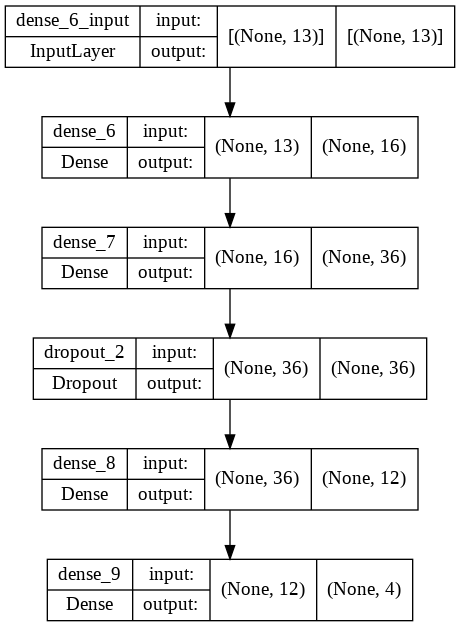

In [28]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file = 'model_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
# Model compilation 
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [30]:
import keras
from keras.callbacks import EarlyStopping


In [31]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs. 
es = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                   mode = 'min',
                                   patience = 100,
                                   restore_best_weights = True,
                                   verbose= 1)

In [32]:
# now we just update our model fit call
history = model.fit(X_train,
                    dummy_y_train,
                    callbacks = [es],
                    epochs = 800000,
                    batch_size = 5,
                    shuffle = True,
                    validation_split= 0.1,
                    verbose=1)

Epoch 1/800000
26/26 [==============================] - 1s 11ms/step - loss: 1.5796 - accuracy: 0.1508 - val_loss: 1.4542 - val_accuracy: 0.0714
Epoch 2/800000
26/26 [==============================] - 0s 3ms/step - loss: 1.3700 - accuracy: 0.2937 - val_loss: 1.2811 - val_accuracy: 0.6429
Epoch 3/800000
26/26 [==============================] - 0s 2ms/step - loss: 1.2631 - accuracy: 0.5476 - val_loss: 1.1744 - val_accuracy: 0.6429
Epoch 4/800000
26/26 [==============================] - 0s 3ms/step - loss: 1.2072 - accuracy: 0.5794 - val_loss: 1.1092 - val_accuracy: 0.6429
Epoch 5/800000
26/26 [==============================] - 0s 3ms/step - loss: 1.1625 - accuracy: 0.5794 - val_loss: 1.0749 - val_accuracy: 0.6429
Epoch 6/800000
26/26 [==============================] - 0s 2ms/step - loss: 1.1430 - accuracy: 0.5794 - val_loss: 1.0560 - val_accuracy: 0.6429
Epoch 7/800000
26/26 [==============================] - 0s 3ms/step - loss: 1.1313 - accuracy: 0.5794 - val_loss: 1.0426 - val_accuracy

In [33]:
# learning curve
# accuracy
history_dict = history.history
acc = history_dict['accuracy']
val_acc=history_dict['val_accuracy']


In [34]:
# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']
# range of X (no. of epochs)
epochs = range(1, len(acc)+1)

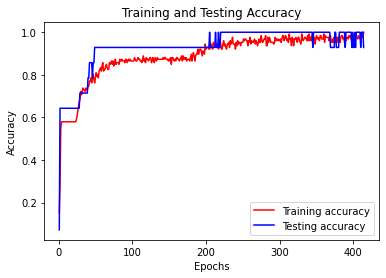

In [35]:
# plot
# "r" is for "solid red line"
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

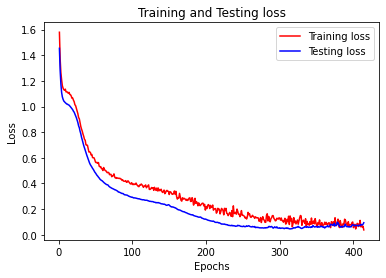

In [36]:
# plot
# "r" is for "solid red line"
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
preds = model.predict(X_test)
print(preds[0])
print(np.sum(preds[2]))


[4.09749616e-03 1.14231625e-05 9.93429959e-01 2.46110628e-03]
1.0000001


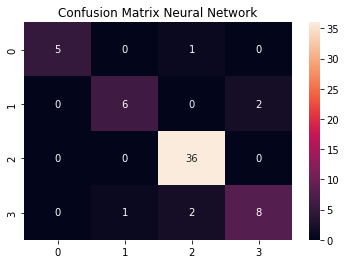

In [38]:
ax= plt.subplot()
matrix = confusion_matrix(dummy_y_test.argmax(axis=1), preds.argmax(axis=1))
ax.set_title('Confusion Matrix Neural Network'); 
sns.heatmap(matrix, annot=True, fmt='g', ax=ax)
plt.show()

In [39]:
print(classification_report(dummy_y_test.argmax(axis=1), preds.argmax(axis=1)))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      0.75      0.80         8
           2       0.92      1.00      0.96        36
           3       0.80      0.73      0.76        11

    accuracy                           0.90        61
   macro avg       0.90      0.83      0.86        61
weighted avg       0.90      0.90      0.90        61



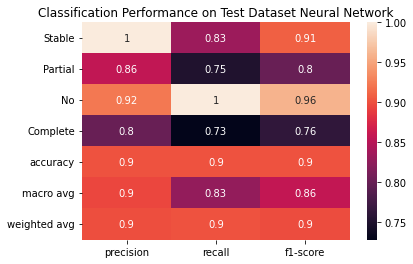

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt     
ax= plt.subplot()
clf_report_nn = classification_report(dummy_y_test.argmax(axis=1), preds.argmax(axis=1), labels=[0, 1, 2 ,3], target_names=['Stable', 'Partial', 'No', 'Complete'], output_dict=True)
sns.heatmap(pd.DataFrame(clf_report_nn).iloc[:-1, :].T, annot=True)
ax.set_title('Classification Performance on Test Dataset Neural Network'); 


In [75]:
 ### Binary Classification problem ###
df2 = pd.read_csv('EGFR_2.csv')
df2 = df.sample(frac=1).reset_index(drop=True)
df2

,Age,Age_normalized,Sex,smoking,survival,sur_time_mo,prog_time_mo,VDW,EEL,EGB,...,EEL.1,EPB,ENPOLAR,TOTAL.1,Matching_rates,Centroid_distance,Connectivity,Convex_atoms,Hydrogen_bonds,response
0,71,4,1,0,0,2.37,2.37,-39.9473,-12.1323,31.1259,...,-12.1323,35.9476,-27.9353,-44.0673,0.3567,53.67,21.525,26,1210,partial
1,71,4,0,0,1,1.28,0.89,-52.2024,-13.9438,35.4939,...,-13.9438,42.2407,-35.3819,-59.2875,0.2978,57.55,15.555,45,1010,no
2,56,2,0,0,1,11.63,5.45,-50.5251,-22.0131,41.9059,...,-22.0131,46.8522,-34.3009,-59.9869,0.4135,48.55,21.019,29,1650,partial
3,52,2,1,0,0,28.78,11.89,-50.5251,-22.0131,41.9059,...,-22.0131,46.8522,-34.3009,-59.9869,0.4135,48.55,21.019,29,1650,partial
4,34,0,0,1,0,2.60,2.10,-52.2760,-17.6311,36.3084,...,-17.6311,39.7891,-34.2095,-64.3275,0.4135,48.55,23.155,23,1650,partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,68,3,1,0,1,13.50,10.55,-51.9140,-26.6512,39.3616,...,-26.6512,38.5811,-36.8522,-76.8363,0.4136,48.25,22.186,27,1450,partial
197,72,2,1,0,0,13.83,13.83,-50.5251,-22.0131,41.9059,...,-22.0131,46.8522,-34.3009,-59.9869,0.4135,48.55,23.051,16,1650,partial
198,50,1,0,0,1,0.85,0.63,-51.9140,-26.6512,39.3616,...,-26.6512,38.5811,-36.8522,-76.8363,0.4136,49.55,14.186,25,1715,no
199,76,4,1,0,1,1.38,0.95,-51.9583,-17.1889,35.8271,...,-17.1889,37.3161,-35.0457,-66.8767,0.4136,48.25,15.186,31,1450,no


In [76]:
X = df2.drop(['Age', 'response', 'EEL',  'VDW', 'EPB', 'ENPOLAR'], axis = 1)
y = df2['response']
X.shape

(201, 17)

In [101]:
# In the first step we will split the data in training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_g1,y, test_size=0.3)
# Now since we want the valid (30% each of training data). 
# we have to define valid_size=0.5 (that is 50% of training data)
test_size = 0.3
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train,y_train, test_size=0.1)
print(X_train.shape), print(y_train.shape)
print(X_train1.shape), print(y_train1.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train1 = np.array(X_train1)
y_train1 = np.array(y_train1)

(140, 3)
(140,)
(126, 3)
(126,)
(14, 3)
(14,)
(61, 3)
(61,)


In [92]:
normalized_df=(X-X.mean())/X.std()
 ## Defining Energy, Geometric and Demographics Features ###
X_e = normalized_df[["EGB", "TOTAL", "ESURF", "EEL.1"]]
X_p = normalized_df[["Age_normalized", "Sex", "survival", "sur_time_mo"]]
#X_p = np.array(X_p)
#X_p.dtype
X_e = normalized_df[["EGB", "TOTAL", "ESURF", "EEL.1"]]
X_e = np.array(X_e)
X_e.shape
X_g1 = normalized_df[["Matching_rates", "Connectivity", "Hydrogen_bonds"]]
X_g1 = np.array(X_g1)
X_g2 = normalized_df[["Convex_atoms", "Centroid_distance"]]
X_g2 = np.array(X_g2)
X_total = np.concatenate((X_p, X_e, X_g1, X_g2), axis = 1)
X_totalep = np.concatenate((X_p, X_e), axis = 1)
X_totaleg = np.concatenate((X_e, X_g1, X_g2), axis = 1)
X_totalpg = np.concatenate((X_p, X_g1, X_g2), axis = 1)
X_totalg = np.concatenate((X_g1, X_g2), axis = 1)



X_total.shape
y_train

array(['partial', 'partial', 'partial', 'no', 'partial', 'no', 'partial',
       'partial', 'no', 'partial', 'partial', 'partial', 'partial',
       'partial', 'partial', 'partial', 'partial', 'partial', 'no',
       'partial', 'no', 'no', 'partial', 'partial', 'partial', 'partial',
       'partial', 'no', 'partial', 'no', 'no', 'partial', 'partial',
       'partial', 'partial', 'partial', 'partial', 'no', 'partial', 'no',
       'partial', 'no', 'partial', 'partial', 'no', 'partial', 'partial',
       'partial', 'partial', 'partial', 'no', 'partial', 'partial',
       'partial', 'no', 'partial', 'partial', 'partial', 'partial',
       'partial', 'partial', 'partial', 'partial', 'partial', 'partial',
       'partial', 'no', 'no', 'no', 'partial', 'partial', 'no', 'partial',
       'partial', 'partial', 'no', 'partial', 'no', 'partial', 'partial',
       'partial', 'partial', 'partial', 'partial', 'no', 'partial',
       'partial', 'partial', 'partial', 'partial', 'partial', 'no',
     

In [99]:
# one - hot encoding Y
encoder =  LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
dummy_y_train = np_utils.to_categorical(encoded_y_train)
dummy_y_train.dtype
dummy_y_train.shape
# One-hot encoding Test
encoder_test = LabelEncoder()
encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)
dummy_y_test = np_utils.to_categorical(encoded_y_test)
dummy_y_test.shape
# one - hot encoding Y
encoder =  LabelEncoder()
encoder.fit(y_valid)
encoded_y_valid = encoder.transform(y_valid)
dummy_y_valid = np_utils.to_categorical(encoded_y_valid)
dummy_y_valid.dtype
dummy_y_valid.shape
# one - hot encoding Y
encoder =  LabelEncoder()
encoder.fit(y_train1)
encoded_y_train1 = encoder.transform(y_train1)
dummy_y_train1 = np_utils.to_categorical(encoded_y_train1)
dummy_y_train1.dtype
dummy_y_train1.shape

(126, 2)

In [102]:
# manual nested cross-validation for random forest on a classification dataset
#from sklearn.model_selection import cross_val_predict
#from xgboost import XGBClassifier
#from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, random_state=1, n_informative=10, n_redundant=10)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, valid_ix in cv_outer.split(X_train):
	# split data
	X_train1, X_valid = X_train[train_ix, :], X_train[valid_ix, :]
	y_train1, y_valid = y_train[train_ix], y_train[valid_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = RandomForestClassifier(random_state=1)
	# define search space
	space = dict()
	space['n_estimators'] = [10, 100, 500]
	#space['max_features'] = [2, 4, 6, 10, 12]
	space['max_depth'] = [3, None]
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train1, y_train1)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_valid)
	# evaluate the model
	acc = accuracy_score(y_valid, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=1.000, est=0.984, cfg={'max_depth': 3, 'n_estimators': 10}
>acc=1.000, est=0.992, cfg={'max_depth': 3, 'n_estimators': 10}
>acc=1.000, est=0.992, cfg={'max_depth': 3, 'n_estimators': 10}
>acc=1.000, est=0.992, cfg={'max_depth': 3, 'n_estimators': 10}
>acc=1.000, est=0.992, cfg={'max_depth': 3, 'n_estimators': 10}
>acc=1.000, est=0.992, cfg={'max_depth': 3, 'n_estimators': 10}
>acc=1.000, est=0.992, cfg={'max_depth': 3, 'n_estimators': 10}
>acc=1.000, est=0.992, cfg={'max_depth': 3, 'n_estimators': 10}
>acc=1.000, est=0.968, cfg={'max_depth': 3, 'n_estimators': 10}
>acc=0.929, est=1.000, cfg={'max_depth': 3, 'n_estimators': 10}
Accuracy: 0.993 (0.021)


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_g1,y, test_size=0.3)


In [83]:
# Using SVM method
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
#rbf = svm.SVC(kernel='rbf', gamma=0.5, C=1).fit(X_train, Y_train)
#poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, Y_train)
#poly_pred = poly.predict(X_test)
#rbf_pred = rbf.predict(X_test)
#cvs= cross_val_score(poly, X_train, Y_train, scoring = 'accuracy', cv=cv)
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
for train_ix, valid_ix in cv_outer.split(X_train):
	# split data
	X_train1, X_valid = X_train[train_ix, :], X_train[valid_ix, :]
	y_train1, y_valid = y_train[train_ix], y_train[valid_ix]
	# configure the cross-validation procedure
	cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
	# define the model
	model = SVC()
 	# define search space
	space = dict()
	space = [{"C": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]}]
	space = [{"gamma": [0.001, 0.01, 0.1, 1, 10]}]
	space = [{"kernel": ['poly', 'rbf','linear']}]
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
	# execute search
	result = search.fit(X_train1, y_train1)
	# get the best performing model fit on the whole training set
	best_model_svc = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model_svc.predict(X_valid)
	# evaluate the model
	acc = accuracy_score(y_valid, yhat)
	# store the result
	outer_results.append(acc)
	# report progress
	print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (mean(outer_results), std(outer_results)))

>acc=1.000, est=0.992, cfg={'kernel': 'linear'}
>acc=1.000, est=0.992, cfg={'kernel': 'linear'}
>acc=1.000, est=0.992, cfg={'kernel': 'linear'}
>acc=1.000, est=0.992, cfg={'kernel': 'linear'}
>acc=0.929, est=1.000, cfg={'kernel': 'linear'}
>acc=1.000, est=0.992, cfg={'kernel': 'linear'}
>acc=1.000, est=0.992, cfg={'kernel': 'linear'}
>acc=1.000, est=0.992, cfg={'kernel': 'linear'}
>acc=0.929, est=0.992, cfg={'kernel': 'rbf'}
>acc=1.000, est=0.992, cfg={'kernel': 'linear'}
Accuracy: 0.986 (0.029)
